In [1]:
import pandas as pd
import plotly.express as px 

df = pd.read_csv('StudentsPerformance.csv')
print(df.head())

ModuleNotFoundError: No module named 'pandas'

### Overall score

In [ ]:
# df['overall score'] = df.iloc[:, 5:8].mean(axis = 1)
df['overall_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
# df = df.drop('overall score', axis=1)

print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   overall_score  
0      72.666667  
1      82.333333  
2      92.666667  
3      49.333333  
4      76.333333  


### Porovnávání celkového hodnocení mužů a žen

<AxesSubplot: ylabel='Frequency'>

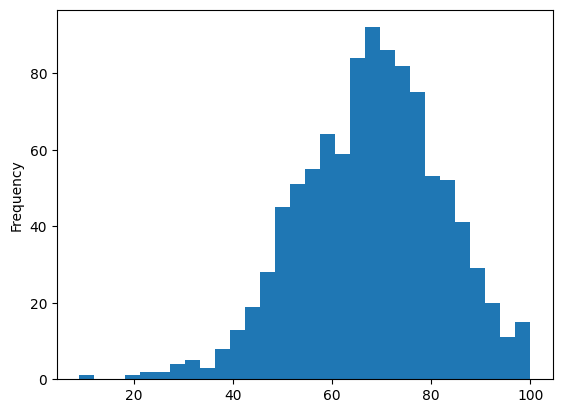

In [ ]:
df['overall score'].plot.hist(bins = 30)

Dohromady

In [ ]:
# df['overall score'].plot.hist(bins = 30)
g = px.histogram(df, x='overall_score', nbins=30, color='gender', title="Overall score of students", labels={"overall_score":"overall score (male + female)"}, width = 800, barmode='overlay')
g.show()

Ženy

0:00:00.034616 0:00:00.065999


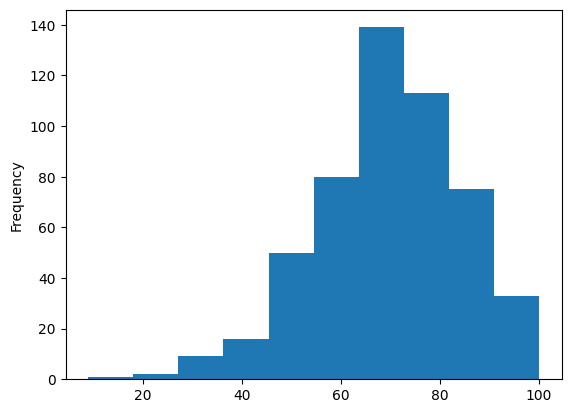

In [ ]:
dff = df['overall_score'].loc[df['gender'] == 'female']

dff.plot.hist()

g = px.histogram(dff, x = 'overall_score', title="Overall score of students", labels={"overall_score":"overall score (female)"}, width=800)
g.show()


Muži

31733.666666666668


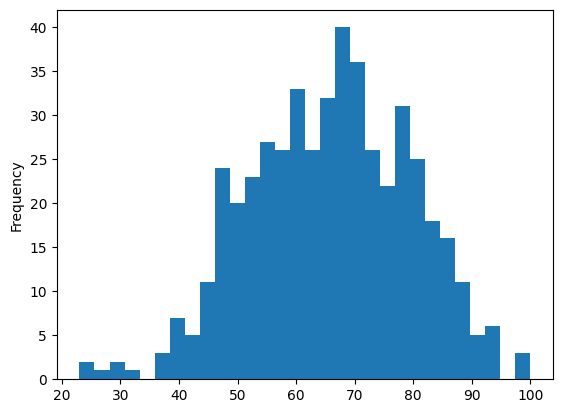

In [ ]:
dfm = df['overall_score'].loc[df['gender'] == 'male']
dfm.plot.hist(bins=30)

g = px.histogram(dfm, x = 'overall_score', width=800, nbins=30)
g.update_traces(xbins=dict(size=2)) #bin_width
g.show()
print(dfm.sum())

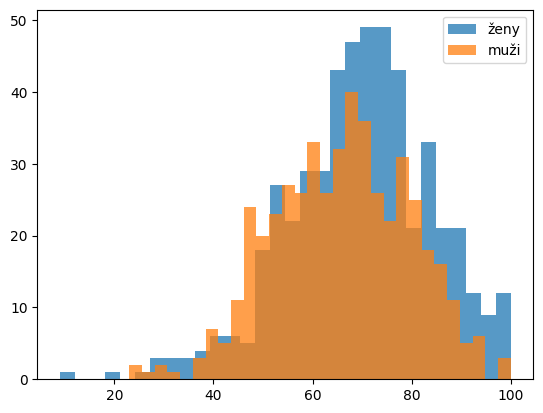

In [ ]:
import matplotlib.pyplot as plt

plt.hist(dff, bins = 30, alpha = 0.75, label = 'ženy')
plt.hist(dfm, bins = 30, alpha = 0.75, label = 'muži')
plt.legend(loc = 'upper right')
plt.show()

g = px.histogram(df, x = "overall_score", color = "gender", width = 800, barmode='overlay')
g.show()

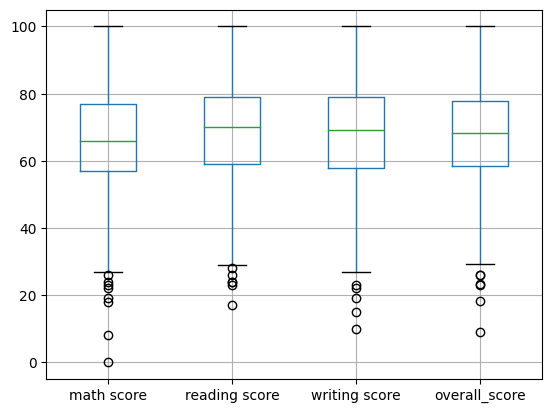

In [ ]:
df.boxplot()
df.rename(columns={'math score':'math_score', 'reading score':'reading_score', 'writing score':'writing_score' })
g= px.box(df, y='overall_score', width=500)
g.show()

gender
female    36037.000000
male      31733.666667
Name: overall score, dtype: float64


<AxesSubplot: xlabel='gender'>

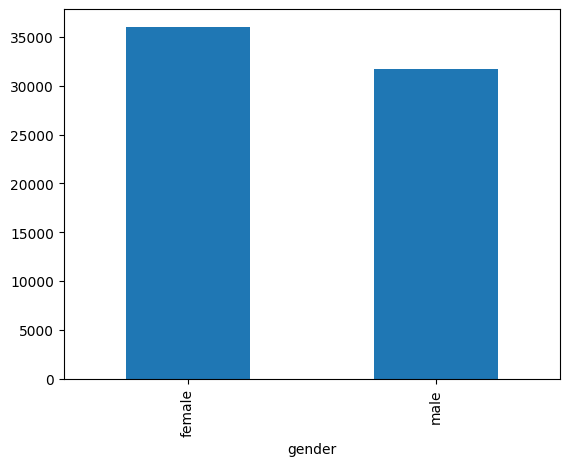

In [ ]:
print(df.groupby('gender').sum()['overall score'])
df.groupby('gender').sum()['overall score'].plot(x = 'overall score', kind = 'bar')
